### Decision Trees

Supervised learning approach used for classification problems, but works well with regression as well.
Works well with categorical and continuous input variables

Decision Trees are supervised learning models used for **classification** and **regression**. They split data into subsets based on feature values to create a tree structure of decisions.

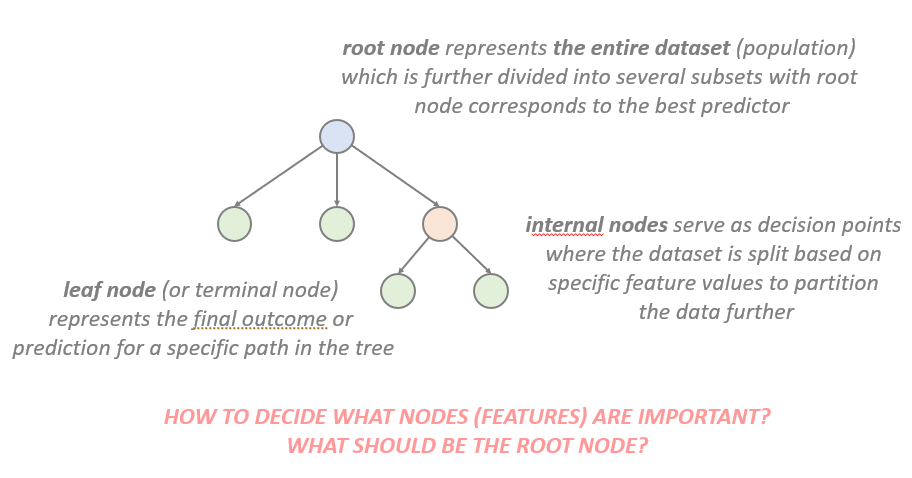

To find the most relevant feature, we consider the best possible feature.

### Entropy 

Entropy quantifies the disorderness in a dataset.

Entropy H(S) = -sum(i=1 to c)pi(log pi)

For completely homogeneous datasets(all true/all false) the entropy is 0 and if all classes are equal then entropy is 1.


### Information Gain – Reduction in Entropy
Information Gain measures the drop in entropy after a dataset is split on a feature.

Example dataset


We want to predict whether a customer will **Buy** a product based on:

- `Age` (categorical)
- `Student` (Yes/No)
- `CreditRating` (Fair/Excellent)

| ID | Age    | Student | CreditRating | Buys |
|----|--------|---------|---------------|------|
| 1  | <=30   | No      | Fair          | No   |
| 2  | <=30   | No      | Excellent     | No   |
| 3  | 31–40  | No      | Fair          | Yes  |
| 4  | >40    | No      | Fair          | Yes  |
| 5  | >40    | Yes     | Fair          | Yes  |
| 6  | >40    | Yes     | Excellent     | No   |
| 7  | 31–40  | Yes     | Excellent     | Yes  |
| 8  | <=30   | No      | Fair          | No   |
| 9  | <=30   | Yes     | Fair          | Yes  |
| 10 | >40    | Yes     | Fair          | Yes  |
| 11 | <=30   | Yes     | Excellent     | Yes  |
| 12 | 31–40  | No      | Excellent     | Yes  |
| 13 | 31–40  | Yes     | Fair          | Yes  |
| 14 | >40    | No      | Excellent     | No   |

1) Entropy of the whole dataset:
(-9/14 log(9/14))-(5/14log(5/14)) = 0.940


2) Information gain of each attribute

| Age    | Count | Yes | No | Entropy |
|--------|-------|-----|----|---------|
| <=30   | 5     | 2   | 3  | 0.971   | =  -(2/5)*log2(2/5)-(3/5)*log2(3/5)
| 31–40  | 4     | 4   | 0  | 0.000   |
| >40    | 5     | 3   | 2  | 0.971   |

Age:

Weighted entropy = (5/14)*0.971 + (4/14)*0 + (5/14)*0.971 

Info gain = 0.940 - weighted entropy = 0.246


| Student | Count | Yes | No | Entropy |
|---------|-------|-----|----|---------|
| Yes     | 6     | 5   | 1  | 0.650   | = (-5/6)*log2(5/6)-(1/6)*log2(1/6)
| No      | 8     | 4   | 4  | 1.000   |

Student:

Wighted entropy = (6/14)*0.650 + (8/14)*1

Info gain = 0.940 - weighted entropy = 0.091



| CreditRating | Count | Yes | No | Entropy |
|--------------|-------|-----|----|---------|
| Fair         | 8     | 6   | 2  | 0.811   |
| Excellent    | 6     | 3   | 3  | 1.000   |

Credit Rating: 

Info gain = 0.048

The feature with the **highest Information Gain** is chosen for the split. Here it is Age.

In the subsequent splits, we subsequently  find the split feature in a similar manner after classifying the first split.






This method is computationally very expensive. Calculating the log base 2 is very time consuming operation

### Gini Index Approach:

We dont have to compute the log base 2.Instead of calculating entropy, this approach focusses on the probability of misclassifying an instance when it is randomly labelled.

Gini(S) =   1 - sigma(i=1 to c) (pi^2)

For completely Homogeneous, gini is 0  and maximum value is 0.5.

Gini(split) = sum(v) (|Sv|/|S|)*Gini(Sv)


The minimum weighted gini is chosen.

Pros:

| Feature                              | Explanation                                                                    |
| ------------------------------------ | ------------------------------------------------------------------------------ |
| **Easy to Understand**               | Intuitive to interpret — resembles human decision-making.                      |
| **No Feature Scaling Needed**        | Works well without normalization or standardization.                           |
| **Handles Both Data Types**          | Can process numerical and categorical variables.                               |
| **Requires Little Data Preparation** | No need for one-hot encoding or scaling.                                       |
| **Non-linear Relationships**         | Captures non-linear patterns between features and target.                      |
| **Feature Importance**               | Can rank features by importance (especially in ensembles like Random Forests). |
| **Fast Inference**                   | Once built, predictions are fast (just traversing the tree).                   |


Cons:
Not suitable for high dimensional data, imbalanced dataset

| Issue                               | Explanation                                                                |
| ----------------------------------- | -------------------------------------------------------------------------- |
| **Overfitting**                     | Prone to overfitting, especially on small datasets or when trees are deep. |
| **Unstable**                        | Small changes in data can lead to completely different trees.              |
| **Greedy Splits**                   | Uses greedy algorithms (like ID3/CART), may not find the global optimum.   |
| **Biased Splits**                   | Categorical variables with many levels may dominate splits.                |
| **Poor Generalization**             | Single decision trees may have low predictive accuracy.                    |
| **Hard to Visualize (Large Trees)** | Large trees are hard to interpret and visualize.                           |


### Implementation

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

the max_Depth limits the depth of the tree, for larger datasets, the depth may increase a lot.


In [6]:
model=DecisionTreeClassifier()
predictions=cross_validate(model, X, y, cv=10)
print(predictions)

{'fit_time': array([0.01651406, 0.0039463 , 0.0025804 , 0.00614381, 0.00302815,
       0.00263286, 0.00302172, 0.00204825, 0.00153017, 0.02291465]), 'score_time': array([0.00200558, 0.0024519 , 0.00197101, 0.00205946, 0.00200343,
       0.00193095, 0.0039866 , 0.00199795, 0.00203967, 0.00299883]), 'test_score': array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])}


we have 10 test scores for each of the test set. Decision trees have the tendency to overfit.

### Gridsearch CV

In [8]:
param_grid = {'max_depth': np.arange(1, 10),
              'criterion': ['gini', 'entropy', 'log_loss']}
param_grid

{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'criterion': ['gini', 'entropy', 'log_loss']}

In [11]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid_search.fit(Xtrain,ytrain)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': np.int64(3)}


In [12]:
grid_predictions=grid_search.predict(Xtest)
print("Grid Search Predictions:", grid_predictions)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(ytest, grid_predictions)
print("Accuracy of Grid Search:", accuracy)
conf_matrix = confusion_matrix(ytest, grid_predictions)
print("Confusion Matrix:\n", conf_matrix)

Grid Search Predictions: [2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 1 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 2 1 0 1 2 1]
Accuracy of Grid Search: 0.9333333333333333
Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


### Cancer data

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print("Breast Cancer dataset loaded with shape:", X.shape)
print(X)

Breast Cancer dataset loaded with shape: (569, 30)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [2]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

When there is numerical features involved, split it on the mean.

In [3]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
predictions=cross_validate(model, X, y, cv=10)
print("Cross-validation results:", np.mean(predictions['test_score']))

Cross-validation results: 0.9385025062656641


In [4]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=10)
predictions=cross_validate(model, X, y, cv=10)
print("Cross-validation results:", np.mean(predictions['test_score']))

Cross-validation results: 0.9315162907268169


## For regression


This example demonstrates how to build a **Decision Tree Regressor** using two features to predict a continuous target. We'll walk through both a **manual numerical example** and an **implementation using scikit-learn**.

---

## Problem Statement

Predict the **house price** based on:
- `Size` (in sqft)
- `Number of rooms`

---

## Dataset

| Sample | Size (sqft) | Rooms | Price (₹ in Lakhs) |
|--------|-------------|--------|--------------------|
| A      | 1000        | 2      | 50                 |
| B      | 1100        | 3      | 55                 |
| C      | 1200        | 2      | 60                 |
| D      | 1300        | 3      | 65                 |
| E      | 1400        | 4      | 70                 |

---

##  Step-by-Step Manual Splits

We’ll consider splits on:
1. `Size` (continuous)
2. `Rooms` (discrete)

We aim to minimize **Mean Squared Error (MSE)** after each split.

---

### 🔹 Try Split on `Size < 1250`

**Left node**: A, B, C → Prices = [50, 55, 60], Mean = 55  
**Right node**: D, E → Prices = [65, 70], Mean = 67.5

#### Left Node MSE(Mean Square errir):
\[
\frac{(50 - 55)^2 + (55 - 55)^2 + (60 - 55)^2}{3} = \frac{25 + 0 + 25}{3} = 16.67
\]

#### Right Node MSE:
\[
\frac{(65 - 67.5)^2 + (70 - 67.5)^2}{2} = \frac{6.25 + 6.25}{2} = 6.25
\]

#### Total Weighted MSE:
\[
\frac{3}{5} \cdot 16.67 + \frac{2}{5} \cdot 6.25 = 10.0 + 2.5 = \textbf{12.5}
\]

---

### 🔹 Try Split on `Rooms < 3`

**Left node**: A, C → Rooms = 2 → Prices = [50, 60], Mean = 55  
**Right node**: B, D, E → Rooms = 3, 3, 4 → Prices = [55, 65, 70], Mean ≈ 63.33

#### Left Node MSE:
\[
\frac{(50 - 55)^2 + (60 - 55)^2}{2} = \frac{25 + 25}{2} = 25
\]

#### Right Node MSE:
\[
\frac{(55 - 63.33)^2 + (65 - 63.33)^2 + (70 - 63.33)^2}{3} 
= \frac{(69.4 + 2.78 + 44.4)}{3} ≈ 38.86
\]

#### Total Weighted MSE:
\[
\frac{2}{5} \cdot 25 + \frac{3}{5} \cdot 38.86 ≈ 10 + 23.31 = \textbf{33.31}
\]

---

### 🔹 Try Split on `Rooms < 4`

**Left node**: A, B, C, D → Rooms = 2, 3, 2, 3 → Prices = [50, 55, 60, 65], Mean = 57.5  
**Right node**: E → [70], Mean = 70

#### Left Node MSE:
\[
\frac{(50 - 57.5)^2 + (55 - 57.5)^2 + (60 - 57.5)^2 + (65 - 57.5)^2}{4}
= \frac{56.25 + 6.25 + 6.25 + 56.25}{4} = 31.25
\]

#### Right Node MSE:
\[
(70 - 70)^2 = 0
\]

#### Total Weighted MSE:
\[
\frac{4}{5} \cdot 31.25 + \frac{1}{5} \cdot 0 = \textbf{25}
\]

---

### ✅ Best Split

| Split Condition     | Weighted MSE |
|---------------------|--------------|
| `Size < 1250`       | **12.5** ✅ |
| `Rooms < 3`         | 33.31       |
| `Rooms < 4`         | 25          |

So, the tree should split first on `Size < 1250`.

---